In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"C:\Users\DCL\Data_Science\Final_Year_Project\Data_Set"
CATEGORIES = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']

In [3]:
data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories)
    label = CATEGORIES.index(categories)
   # print(folder)
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        #print(img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(256,256))
        #print(img_arr)
        #plt.imshow(img_arr)
        #break
        data.append([img_arr,label])

In [4]:
data

[[array([[[168, 168, 168],
          [166, 166, 166],
          [170, 170, 170],
          ...,
          [109, 109, 109],
          [119, 119, 119],
          [130, 130, 130]],
  
         [[169, 169, 169],
          [164, 164, 164],
          [165, 165, 165],
          ...,
          [135, 135, 135],
          [148, 148, 148],
          [136, 136, 136]],
  
         [[174, 174, 174],
          [166, 166, 166],
          [164, 164, 164],
          ...,
          [113, 113, 113],
          [122, 122, 122],
          [138, 138, 138]],
  
         ...,
  
         [[161, 161, 161],
          [157, 157, 157],
          [159, 159, 159],
          ...,
          [104, 104, 104],
          [124, 124, 124],
          [100, 100, 100]],
  
         [[157, 157, 157],
          [152, 152, 152],
          [154, 154, 154],
          ...,
          [110, 110, 110],
          [118, 118, 118],
          [105, 105, 105]],
  
         [[159, 159, 159],
          [155, 155, 155],
          [161, 161, 161

In [5]:
random.shuffle(data) #mixup data

In [6]:
x = [] #image arry
y = [] #label

for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
x = np.array(x) #convet x from list to array
y = np.array(y) #convert y from list to array

In [8]:
x

array([[[[104, 104, 104],
         [104, 104, 104],
         [118, 118, 118],
         ...,
         [113, 113, 113],
         [110, 110, 110],
         [118, 118, 118]],

        [[102, 102, 102],
         [ 83,  83,  83],
         [112, 112, 112],
         ...,
         [114, 114, 114],
         [110, 110, 110],
         [116, 116, 116]],

        [[102, 102, 102],
         [135, 135, 135],
         [120, 120, 120],
         ...,
         [125, 125, 125],
         [119, 119, 119],
         [123, 123, 123]],

        ...,

        [[130, 130, 130],
         [149, 149, 149],
         [136, 136, 136],
         ...,
         [185, 185, 185],
         [189, 189, 189],
         [194, 194, 194]],

        [[158, 158, 158],
         [141, 141, 141],
         [147, 147, 147],
         ...,
         [184, 184, 184],
         [190, 190, 190],
         [198, 198, 198]],

        [[190, 190, 190],
         [155, 155, 155],
         [176, 176, 176],
         ...,
         [185, 185, 185],
        

In [9]:
x = x/255

In [10]:
x

array([[[[0.40784314, 0.40784314, 0.40784314],
         [0.40784314, 0.40784314, 0.40784314],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         ...,
         [0.44313725, 0.44313725, 0.44313725],
         [0.43137255, 0.43137255, 0.43137255],
         [0.4627451 , 0.4627451 , 0.4627451 ]],

        [[0.4       , 0.4       , 0.4       ],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         [0.43921569, 0.43921569, 0.43921569],
         ...,
         [0.44705882, 0.44705882, 0.44705882],
         [0.43137255, 0.43137255, 0.43137255],
         [0.45490196, 0.45490196, 0.45490196]],

        [[0.4       , 0.4       , 0.4       ],
         [0.52941176, 0.52941176, 0.52941176],
         [0.47058824, 0.47058824, 0.47058824],
         ...,
         [0.49019608, 0.49019608, 0.49019608],
         [0.46666667, 0.46666667, 0.46666667],
         [0.48235294, 0.48235294, 0.48235294]],

        ...,

        [[0.50980392, 0.50980392, 0.50980392],
         [0.58431373, 0.58431373, 0.58431373]

In [11]:
x.shape

(1359, 256, 256, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [15]:
history = model.fit(x,y,epochs=50,validation_split= .1)

Epoch 1/50
39/39 [==============================] - 72s 2s/step - loss: 1.2886 - accuracy: 0.7146 - val_loss: 1.1431 - val_accuracy: 0.7500
Epoch 2/50
39/39 [==============================] - 69s 2s/step - loss: 1.1334 - accuracy: 0.7343 - val_loss: 1.0344 - val_accuracy: 0.7500
Epoch 3/50
39/39 [==============================] - 72s 2s/step - loss: 1.1200 - accuracy: 0.7343 - val_loss: 0.9977 - val_accuracy: 0.7500
Epoch 4/50
39/39 [==============================] - 65s 2s/step - loss: 1.0801 - accuracy: 0.7343 - val_loss: 0.9846 - val_accuracy: 0.7500
Epoch 5/50
39/39 [==============================] - 63s 2s/step - loss: 1.0520 - accuracy: 0.7343 - val_loss: 0.9499 - val_accuracy: 0.7500
Epoch 6/50
39/39 [==============================] - 64s 2s/step - loss: 1.0357 - accuracy: 0.7359 - val_loss: 0.9239 - val_accuracy: 0.7500
Epoch 7/50
39/39 [==============================] - 64s 2s/step - loss: 1.0108 - accuracy: 0.7400 - val_loss: 0.9947 - val_accuracy: 0.7647
Epoch 8/50
39/39 [==

In [16]:
history

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
type(history.history['loss'])

list

In [19]:
len(history.history['loss'])

50

In [20]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2886208295822144,
 1.1333588361740112,
 1.1199573278427124,
 1.0801279544830322,
 1.0519758462905884]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

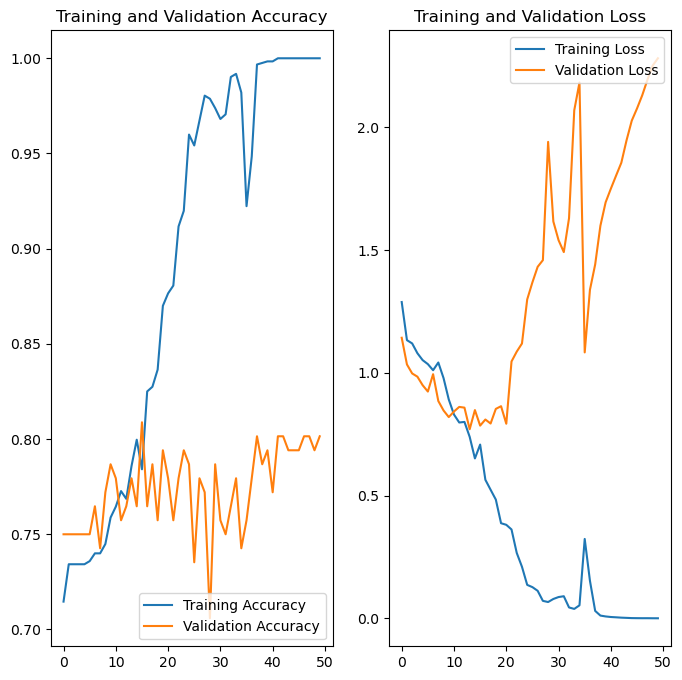

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()